# Universidad Nacional de Colombia  
## Sede Bogotá  
### Facultad de Ingeniería
### Departamento de Ingeniería de Sistemas e Industrial

---

## **Inteligencia Artificial y Mini-robots**

**Título del Taller:**  
*Programación genética*

**Autor:**  
*Juan Jeronimo Gómez Rubiano*  

**Periodo:**  
*2025-2*

**Fecha de entrega:**  
*Septiembre 18/2025*

---

*El source code junto a este documento es encuentran disponible en el siguiente repositorio público de github: https://github.com/jujgomezru/ia-minirobots*

## Ejercicio 2

### Suponga que desea utilizar Programación Genética para encontrar el diseño de un circuito lógico, tome como, ejemplo el codificador de 7 segmentos. Describa el conjunto de terminales, el conjunto de funciones y la función de aptitud. Use una librería de Python.

In [ ]:
# ✅ INSTALAR LIBRERÍA
!pip install deap --quiet

In [11]:
import operator
import random
import numpy as np
from deap import base, creator, tools, gp
import matplotlib.pyplot as plt

# ====== TABLA DE VERDAD DEL MULTIPLICADOR DE 2 BITS ======
# Entradas: A1, A0, B1, B0 (dos números de 2 bits)
entradas = []
for a in range(4):
    for b in range(4):
        a_bits = [int(bit) for bit in format(a, '02b')]
        b_bits = [int(bit) for bit in format(b, '02b')]
        entradas.append(a_bits + b_bits)  # [A1, A0, B1, B0]

# Salidas esperadas: P3, P2, P1, P0 (producto de 4 bits)
salidas = []
for a in range(4):
    for b in range(4):
        product = a * b
        salidas.append([int(bit) for bit in format(product, '04b')])

# ====== DEFINIR PRIMITIVAS GP ======
pset = gp.PrimitiveSet("MAIN", 4)  # 4 inputs: A1, A0, B1, B0

# Operadores lógicos
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addPrimitive(operator.xor, 2)

# Constantes lógicas
pset.addTerminal(0)
pset.addTerminal(1)

# Renombrar inputs
pset.renameArguments(ARG0='A1')
pset.renameArguments(ARG1='A0')
pset.renameArguments(ARG2='B1')
pset.renameArguments(ARG3='B0')

# ====== DEFINIR INDIVIDUO Y APTITUD ======
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# ====== FUNCIÓN DE APTITUD PARA UNA SALIDA ======
def evaluar(individuo, salida_index):
    func = toolbox.compile(expr=individuo)
    error = 0
    for i in range(len(entradas)):
        entrada = entradas[i]
        salida_esperada = salidas[i][salida_index]
        try:
            salida = func(*entrada)
            if salida != salida_esperada:
                error += 1
        except:
            error += 1
    return (error,)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# ====== EJECUTAR GP PARA CADA SALIDA (P0, P1, P2, P3) ======
MEJORES = []
nombres_salidas = ['P0', 'P1', 'P2', 'P3']

for salida_idx in range(4):
    print(f"\n🔧 Evolucionando salida {nombres_salidas[salida_idx]}:")
    toolbox.register("evaluate", evaluar, salida_index=salida_idx)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    from deap import algorithms
    pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 60,
                                   stats=stats, halloffame=hof, verbose=False)

    best_ind = hof[0]
    print(f"✅ Árbol lógico (error={best_ind.fitness.values[0]}):\n{best_ind}")
    MEJORES.append(best_ind)

# ====== RESULTADO FINAL ======
print("\n📌 Expresiones lógicas evolutivas para el multiplicador de 2 bits:")
for i, ind in enumerate(MEJORES):
    print(f"Salida {nombres_salidas[i]}: {ind}")

# ====== VERIFICACIÓN DE RESULTADOS ======
print("\n🧪 Verificación de resultados:")
for i in range(len(entradas)):
    entrada = entradas[i]
    salida_calculada = []
    for j, ind in enumerate(MEJORES):
        func = toolbox.compile(expr=ind)
        salida_calculada.append(func(*entrada))
    
    print(f"Entrada {entrada}: Esperado {salidas[i]}, Obtenido {salida_calculada}")


🔧 Evolucionando salida P0:
✅ Árbol lógico (error=0.0):
and_(B0, and_(xor(A0, 0), xor(and_(A1, B1), xor(B0, 1))))

🔧 Evolucionando salida P1:
✅ Árbol lógico (error=0.0):
and_(and_(A1, xor(and_(xor(0, A0), B0), A1)), B1)

🔧 Evolucionando salida P2:
✅ Árbol lógico (error=0.0):
xor(and_(or_(B1, B1), A0), and_(B0, A1))

🔧 Evolucionando salida P3:
✅ Árbol lógico (error=0.0):
and_(B0, A0)

📌 Expresiones lógicas evolutivas para el multiplicador de 2 bits:
Salida P0: and_(B0, and_(xor(A0, 0), xor(and_(A1, B1), xor(B0, 1))))
Salida P1: and_(and_(A1, xor(and_(xor(0, A0), B0), A1)), B1)
Salida P2: xor(and_(or_(B1, B1), A0), and_(B0, A1))
Salida P3: and_(B0, A0)

🧪 Verificación de resultados:
Entrada [0, 0, 0, 0]: Esperado [0, 0, 0, 0], Obtenido [0, 0, 0, 0]
Entrada [0, 0, 0, 1]: Esperado [0, 0, 0, 0], Obtenido [0, 0, 0, 0]
Entrada [0, 0, 1, 0]: Esperado [0, 0, 0, 0], Obtenido [0, 0, 0, 0]
Entrada [0, 0, 1, 1]: Esperado [0, 0, 0, 0], Obtenido [0, 0, 0, 0]
Entrada [0, 1, 0, 0]: Esperado [0, 0, 0, 0

## Ejercicio 3

### Suponga que tiene un robot que le entrega galletas al grupo de ingenieros de diseño de robots. Programe por PG el recorrido del robot, teniendo en cuenta que cada vez que un ingeniero recibe una galleta gana puntos. Los ingenieros están distribuidos en una sala cuadrada. Defina, conjunto de terminales, conjunto de funciones y función de aptitud.

=== ROBOT REPARTIDOR DE GALLETAS - PROGRAMACIÓN GENÉTICA ===

Configuración del problema:
- Sala: 10x10 celdas (coordenadas enteras)
- Ingenieros: 8 distribuidos aleatoriamente
- Robot inicia en el centro (5,5) con 10 galletas
- Movimiento: 1 celda por vez (norte, sur, este, oeste)
- Entrega: Si está en celda adyacente al ingeniero
- Objetivo: Maximizar galletas entregadas y cobertura

Conjuntos definidos:
Terminales: ['mover_norte', 'mover_sur', 'mover_este', 'mover_oeste', 'entregar_galleta', 'buscar_ingeniero_cercano', 'ir_centro', 'mover_aleatorio']
Funciones: ['secuencia', 'si_hay_galletas', 'repetir', 'si_ingeniero_cerca', 'mover_hacia', 'si_ingeniero_adyacente']

Iniciando evolución...

Generación 1: Mejor aptitud = 1700.00
Generación 2: Mejor aptitud = 1248.00
Generación 3: Mejor aptitud = 1690.00
Generación 4: Mejor aptitud = 1700.00
Generación 5: Mejor aptitud = 1712.00
Generación 6: Mejor aptitud = 1710.00
Generación 7: Mejor aptitud = 1712.00
Generación 8: Mejor aptitud = 1

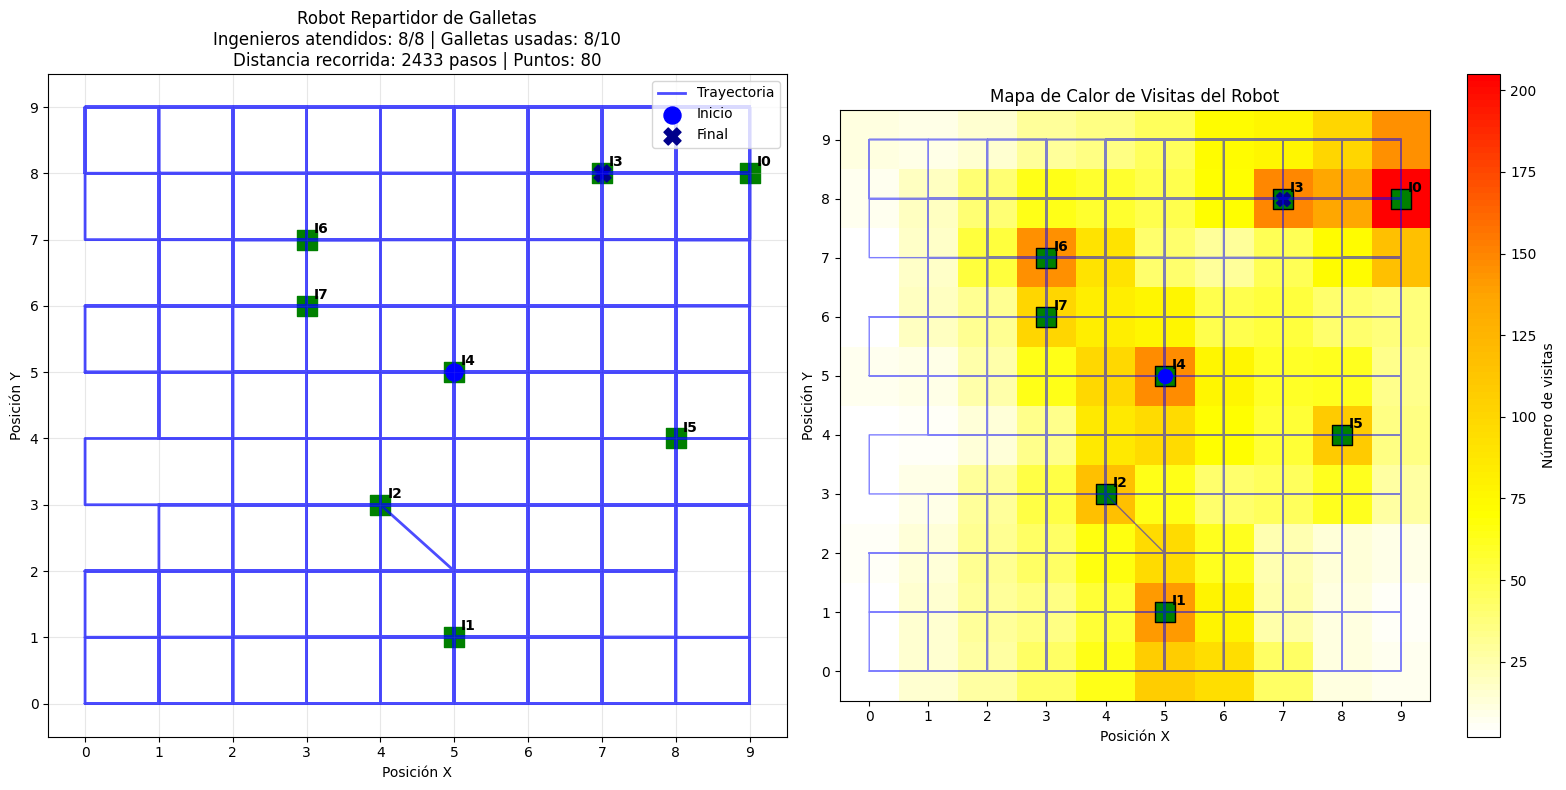

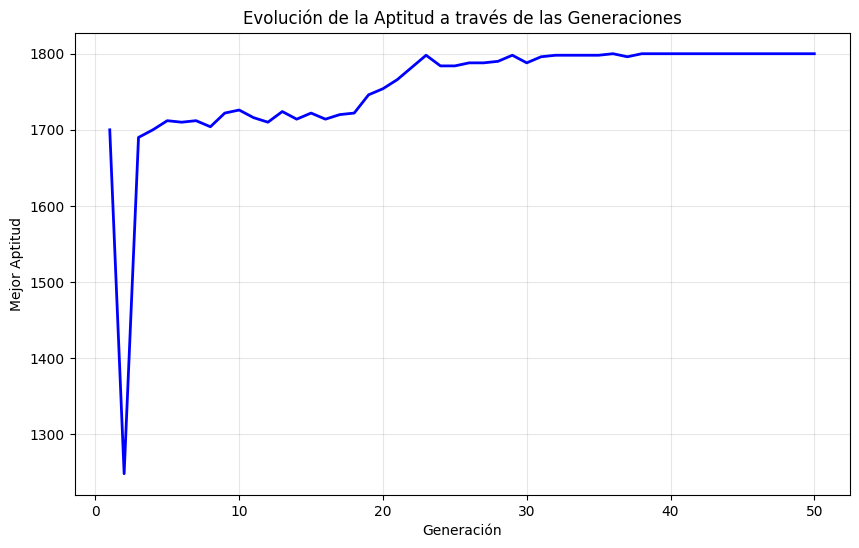

In [13]:
import random
import math
import copy
from typing import List, Tuple, Any
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

class Ingeniero:
    """Representa un ingeniero en la sala"""
    def __init__(self, x: int, y: int, id: int):
        self.x = x
        self.y = y
        self.id = id
        self.galletas_recibidas = 0
        self.visitado = False

class Robot:
    """Representa el robot repartidor"""
    def __init__(self, x: int = 5, y: int = 5):
        self.x = x
        self.y = y
        self.galletas = 10  # Número inicial de galletas
        self.puntos = 0
        self.distancia_recorrida = 0
        self.posiciones_visitadas = [(x, y)]

class Nodo:
    """Nodo del árbol de programación genética"""
    def __init__(self, valor, hijos=None):
        self.valor = valor
        self.hijos = hijos if hijos else []
        self.es_terminal = len(self.hijos) == 0

class ProgramacionGenetica:
    """Implementación de Programación Genética para el robot"""

    def __init__(self, sala_size=10, num_ingenieros=8):
        self.sala_size = sala_size
        self.num_ingenieros = num_ingenieros

        # Conjunto de Terminales
        self.terminales = [
            'mover_norte', 'mover_sur', 'mover_este', 'mover_oeste',
            'entregar_galleta', 'buscar_ingeniero_cercano', 'ir_centro',
            'mover_aleatorio'  # Nueva acción terminal
        ]

        # Conjunto de Funciones
        self.funciones = {
            'secuencia': 2,           # Ejecuta dos acciones en secuencia
            'si_hay_galletas': 2,     # If-then-else basado en galletas disponibles
            'repetir': 2,             # Repite una acción n veces
            'si_ingeniero_cerca': 2,  # If-then-else basado en proximidad
            'mover_hacia': 2,         # Nueva función: mover hacia dirección específica
            'si_ingeniero_adyacente': 2  # Nueva función: si hay ingeniero adyacente
        }

        # Configuración del algoritmo
        self.tam_poblacion = 400  # 
        self.max_generaciones = 50   # Número de generaciones
        self.prob_mutacion = 0.15     # 
        self.prob_cruce = 0.85        #
        self.max_profundidad = 8      # 

    def crear_ingenieros(self) -> List[Ingeniero]:
        """Crea ingenieros distribuidos aleatoriamente en la sala con coordenadas enteras"""
        ingenieros = []
        for i in range(self.num_ingenieros):
            x = random.randint(1, self.sala_size - 1)
            y = random.randint(1, self.sala_size - 1)
            ingenieros.append(Ingeniero(x, y, i))
        return ingenieros

    def crear_nodo_aleatorio(self, profundidad=0, metodo='grow'):
        """Crea un nodo aleatorio del árbol"""
        if profundidad >= self.max_profundidad or (metodo == 'grow' and random.random() < 0.3):
            # Crear terminal
            return Nodo(random.choice(self.terminales))
        else:
            # Crear función
            funcion = random.choice(list(self.funciones.keys()))
            num_hijos = self.funciones[funcion]
            hijos = [self.crear_nodo_aleatorio(profundidad + 1, metodo) for _ in range(num_hijos)]
            return Nodo(funcion, hijos)

    def ejecutar_programa(self, nodo: Nodo, robot: Robot, ingenieros: List[Ingeniero], pasos_max=100):
        """Ejecuta el programa genético en el robot"""
        if pasos_max <= 0:
            return

        if nodo.es_terminal:
            self.ejecutar_terminal(nodo.valor, robot, ingenieros)
        else:
            self.ejecutar_funcion(nodo.valor, nodo.hijos, robot, ingenieros, pasos_max)

    def ejecutar_terminal(self, accion: str, robot: Robot, ingenieros: List[Ingeniero]):
        """Ejecuta una acción terminal con coordenadas enteras"""
        if accion == 'mover_norte':
            nueva_y = min(robot.y + 1, self.sala_size - 1)
            robot.distancia_recorrida += abs(nueva_y - robot.y)
            robot.y = nueva_y

        elif accion == 'mover_sur':
            nueva_y = max(robot.y - 1, 0)
            robot.distancia_recorrida += abs(nueva_y - robot.y)
            robot.y = nueva_y

        elif accion == 'mover_este':
            nueva_x = min(robot.x + 1, self.sala_size - 1)
            robot.distancia_recorrida += abs(nueva_x - robot.x)
            robot.x = nueva_x

        elif accion == 'mover_oeste':
            nueva_x = max(robot.x - 1, 0)
            robot.distancia_recorrida += abs(nueva_x - robot.x)
            robot.x = nueva_x

        elif accion == 'mover_aleatorio':
            # Nueva acción: movimiento aleatorio para exploración
            direccion = random.choice(['norte', 'sur', 'este', 'oeste'])
            if direccion == 'norte':
                nueva_y = min(robot.y + 1, self.sala_size - 1)
                robot.distancia_recorrida += abs(nueva_y - robot.y)
                robot.y = nueva_y
            elif direccion == 'sur':
                nueva_y = max(robot.y - 1, 0)
                robot.distancia_recorrida += abs(nueva_y - robot.y)
                robot.y = nueva_y
            elif direccion == 'este':
                nueva_x = min(robot.x + 1, self.sala_size - 1)
                robot.distancia_recorrida += abs(nueva_x - robot.x)
                robot.x = nueva_x
            elif direccion == 'oeste':
                nueva_x = max(robot.x - 1, 0)
                robot.distancia_recorrida += abs(nueva_x - robot.x)
                robot.x = nueva_x

        elif accion == 'entregar_galleta':
            if robot.galletas > 0:
                # Buscar ingeniero en la misma posición o adyacente que NO haya recibido galleta
                for ingeniero in ingenieros:
                    distancia = abs(robot.x - ingeniero.x) + abs(robot.y - ingeniero.y)  # Distancia Manhattan
                    if distancia <= 1 and ingeniero.galletas_recibidas == 0:  # Solo si no ha recibido galleta
                        robot.galletas -= 1
                        ingeniero.galletas_recibidas = 1  # Máximo 1 galleta por ingeniero
                        robot.puntos += 10  # Puntos por entregar galleta
                        break

        elif accion == 'buscar_ingeniero_cercano':
            if ingenieros:
                # Encontrar el ingeniero más cercano que NO haya recibido galleta
                ingenieros_sin_galleta = [ing for ing in ingenieros if ing.galletas_recibidas == 0]

                if ingenieros_sin_galleta:  # Si hay ingenieros que no han recibido galleta
                    distancias = [(abs(robot.x - ing.x) + abs(robot.y - ing.y), ing)
                                for ing in ingenieros_sin_galleta]
                    distancia_min, ingeniero_cercano = min(distancias, key=lambda x: x[0])
                else:
                    # Si todos ya tienen galleta, ir al más cercano de todos
                    distancias = [(abs(robot.x - ing.x) + abs(robot.y - ing.y), ing)
                                for ing in ingenieros]
                    distancia_min, ingeniero_cercano = min(distancias, key=lambda x: x[0])

                # Moverse un paso hacia él
                dx = ingeniero_cercano.x - robot.x
                dy = ingeniero_cercano.y - robot.y

                # Decidir si moverse en X o Y (priorizar la mayor diferencia)
                if abs(dx) >= abs(dy) and dx != 0:
                    if dx > 0:
                        robot.x = min(robot.x + 1, self.sala_size - 1)
                    else:
                        robot.x = max(robot.x - 1, 0)
                    robot.distancia_recorrida += 1
                elif dy != 0:
                    if dy > 0:
                        robot.y = min(robot.y + 1, self.sala_size - 1)
                    else:
                        robot.y = max(robot.y - 1, 0)
                    robot.distancia_recorrida += 1

        elif accion == 'ir_centro':
            centro_x, centro_y = self.sala_size // 2, self.sala_size // 2
            dx = centro_x - robot.x
            dy = centro_y - robot.y

            # Moverse un paso hacia el centro
            if abs(dx) >= abs(dy) and dx != 0:
                if dx > 0:
                    robot.x = min(robot.x + 1, self.sala_size - 1)
                else:
                    robot.x = max(robot.x - 1, 0)
                robot.distancia_recorrida += 1
            elif dy != 0:
                if dy > 0:
                    robot.y = min(robot.y + 1, self.sala_size - 1)
                else:
                    robot.y = max(robot.y - 1, 0)
                robot.distancia_recorrida += 1

        robot.posiciones_visitadas.append((robot.x, robot.y))

    def ejecutar_funcion(self, funcion: str, hijos: List[Nodo], robot: Robot,
                        ingenieros: List[Ingeniero], pasos_max: int):
        """Ejecuta una función no-terminal"""
        if funcion == 'secuencia':
            self.ejecutar_programa(hijos[0], robot, ingenieros, pasos_max - 1)
            self.ejecutar_programa(hijos[1], robot, ingenieros, pasos_max - 1)

        elif funcion == 'si_hay_galletas':
            if robot.galletas > 0:
                self.ejecutar_programa(hijos[0], robot, ingenieros, pasos_max - 1)
            else:
                self.ejecutar_programa(hijos[1], robot, ingenieros, pasos_max - 1)

        elif funcion == 'repetir':
            for _ in range(3):  # Repetir 3 veces
                if pasos_max > 0:
                    self.ejecutar_programa(hijos[0], robot, ingenieros, pasos_max - 1)
                    pasos_max -= 1

        elif funcion == 'si_ingeniero_cerca':
            # Verificar si hay algún ingeniero cerca (distancia Manhattan <= 2)
            ingeniero_cerca = any(
                abs(robot.x - ing.x) + abs(robot.y - ing.y) <= 2
                for ing in ingenieros
            )

            if ingeniero_cerca:
                self.ejecutar_programa(hijos[0], robot, ingenieros, pasos_max - 1)
            else:
                self.ejecutar_programa(hijos[1], robot, ingenieros, pasos_max - 1)
                
        elif funcion == 'mover_hacia':
            # Nueva función: mover hacia una dirección específica
            direccion = random.choice(['norte', 'sur', 'este', 'oeste'])
            if direccion == 'norte':
                nueva_y = min(robot.y + 1, self.sala_size - 1)
                robot.distancia_recorrida += abs(nueva_y - robot.y)
                robot.y = nueva_y
            elif direccion == 'sur':
                nueva_y = max(robot.y - 1, 0)
                robot.distancia_recorrida += abs(nueva_y - robot.y)
                robot.y = nueva_y
            elif direccion == 'este':
                nueva_x = min(robot.x + 1, self.sala_size - 1)
                robot.distancia_recorrida += abs(nueva_x - robot.x)
                robot.x = nueva_x
            elif direccion == 'oeste':
                nueva_x = max(robot.x - 1, 0)
                robot.distancia_recorrida += abs(nueva_x - robot.x)
                robot.x = nueva_x
                
        elif funcion == 'si_ingeniero_adyacente':
            # Nueva función: verificar si hay un ingeniero adyacente
            ingeniero_adyacente = any(
                abs(robot.x - ing.x) + abs(robot.y - ing.y) <= 1
                for ing in ingenieros
            )
            
            if ingeniero_adyacente:
                self.ejecutar_programa(hijos[0], robot, ingenieros, pasos_max - 1)
            else:
                self.ejecutar_programa(hijos[1], robot, ingenieros, pasos_max - 1)

    def funcion_aptitud(self, programa: Nodo) -> float:
        """Función de aptitud que evalúa qué tan bien funciona un programa"""
        # Crear escenario de prueba
        ingenieros = self.crear_ingenieros()
        robot = Robot(self.sala_size // 2, self.sala_size // 2)  # Empezar en el centro

        # Ejecutar programa
        self.ejecutar_programa(programa, robot, ingenieros, pasos_max=100)

        # Calcular aptitud
        ingenieros_atendidos = sum(1 for ing in ingenieros if ing.galletas_recibidas > 0)  # Número de ingenieros únicos atendidos
        cobertura = len(set(robot.posiciones_visitadas))  # Posiciones únicas visitadas

        # Función de aptitud mejorada
        aptitud = (
            ingenieros_atendidos * 200 +         # Priorizar atender más ingenieros únicos (aumentado de 120)
            cobertura * 2 +                      # Recompensa por explorar
            max(0, 50 - robot.distancia_recorrida)  # Penalización por distancia excesiva
        )

        return max(0, aptitud)

    def torneo_seleccion(self, poblacion: List[Tuple[Nodo, float]], k=3) -> Nodo:
        """Selección por torneo"""
        torneo = random.sample(poblacion, min(k, len(poblacion)))
        return max(torneo, key=lambda x: x[1])[0]

    def cruzar(self, padre1: Nodo, padre2: Nodo) -> Tuple[Nodo, Nodo]:
        """Cruzamiento de dos programas"""
        hijo1 = copy.deepcopy(padre1)
        hijo2 = copy.deepcopy(padre2)

        # Seleccionar puntos de cruce aleatorios
        nodos1 = self.obtener_nodos(hijo1)
        nodos2 = self.obtener_nodos(hijo2)

        if len(nodos1) > 1 and len(nodos2) > 1:
            punto1 = random.choice(nodos1[1:])  # Evitar la raíz
            punto2 = random.choice(nodos2[1:])

            # Intercambiar subárboles
            punto1.valor, punto2.valor = punto2.valor, punto1.valor
            punto1.hijos, punto2.hijos = punto2.hijos, punto1.hijos

        return hijo1, hijo2

    def obtener_nodos(self, nodo: Nodo) -> List[Nodo]:
        """Obtiene todos los nodos del árbol"""
        nodos = [nodo]
        for hijo in nodo.hijos:
            nodos.extend(self.obtener_nodos(hijo))
        return nodos

    def mutar(self, programa: Nodo) -> Nodo:
        """Mutación de un programa"""
        programa_mutado = copy.deepcopy(programa)
        nodos = self.obtener_nodos(programa_mutado)

        if nodos:
            nodo_a_mutar = random.choice(nodos)
            if nodo_a_mutar.es_terminal:
                nodo_a_mutar.valor = random.choice(self.terminales)
            else:
                nueva_funcion = random.choice(list(self.funciones.keys()))
                if self.funciones[nueva_funcion] == len(nodo_a_mutar.hijos):
                    nodo_a_mutar.valor = nueva_funcion

        return programa_mutado

    def evolucionar(self):
        """Algoritmo genético principal"""
        # Inicializar población
        poblacion = []
        for _ in range(self.tam_poblacion):
            programa = self.crear_nodo_aleatorio(metodo='ramped-half-and-half')
            poblacion.append(programa)

        mejor_aptitud_por_gen = []
        mejor_programa = None
        mejor_aptitud = 0

        for generacion in range(self.max_generaciones):
            # Evaluar aptitud
            aptitudes = [(prog, self.funcion_aptitud(prog)) for prog in poblacion]

            # Encontrar mejor de esta generación
            mejor_gen = max(aptitudes, key=lambda x: x[1])
            if mejor_gen[1] > mejor_aptitud:
                mejor_aptitud = mejor_gen[1]
                mejor_programa = copy.deepcopy(mejor_gen[0])

            mejor_aptitud_por_gen.append(mejor_gen[1])

            print(f"Generación {generacion + 1}: Mejor aptitud = {mejor_gen[1]:.2f}")

            # Crear nueva población
            nueva_poblacion = []

            # Elitismo: mantener los mejores
            aptitudes.sort(key=lambda x: x[1], reverse=True)
            for i in range(min(10, len(aptitudes))):  # Mantener más individuos élite
                nueva_poblacion.append(copy.deepcopy(aptitudes[i][0]))

            # Generar el resto por cruzamiento y mutación
            while len(nueva_poblacion) < self.tam_poblacion:
                if random.random() < self.prob_cruce:
                    padre1 = self.torneo_seleccion(aptitudes)
                    padre2 = self.torneo_seleccion(aptitudes)
                    hijo1, hijo2 = self.cruzar(padre1, padre2)

                    if random.random() < self.prob_mutacion:
                        hijo1 = self.mutar(hijo1)
                    if random.random() < self.prob_mutacion:
                        hijo2 = self.mutar(hijo2)

                    nueva_poblacion.extend([hijo1, hijo2])
                else:
                    padre = self.torneo_seleccion(aptitudes)
                    hijo = self.mutar(copy.deepcopy(padre))
                    nueva_poblacion.append(hijo)

            poblacion = nueva_poblacion[:self.tam_poblacion]

        return mejor_programa, mejor_aptitud, mejor_aptitud_por_gen

    def imprimir_programa(self, nodo: Nodo, nivel=0):
        """Imprime el programa de forma legible"""
        indent = "  " * nivel
        print(f"{indent}{nodo.valor}")
        for hijo in nodo.hijos:
            self.imprimir_programa(hijo, nivel + 1)

    def visualizar_ejecucion(self, programa: Nodo):
        """Visualiza la ejecución del mejor programa"""
        ingenieros = self.crear_ingenieros()
        robot = Robot(self.sala_size // 2, self.sala_size // 2)

        # Ejecutar programa
        self.ejecutar_programa(programa, robot, ingenieros, pasos_max=100)

        # Crear visualización
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        # Dibujar cuadrícula
        ax1.set_xlim(-0.5, self.sala_size - 0.5)
        ax1.set_ylim(-0.5, self.sala_size - 0.5)
        ax1.grid(True, alpha=0.3)

        # Configurar ticks para mostrar coordenadas enteras
        ax1.set_xticks(range(self.sala_size))
        ax1.set_yticks(range(self.sala_size))

        # Dibujar ingenieros
        for i, ing in enumerate(ingenieros):
            color = 'green' if ing.galletas_recibidas > 0 else 'red'
            ax1.scatter(ing.x, ing.y, c=color, s=200, marker='s')
            ax1.annotate(f'I{i}', (ing.x, ing.y), xytext=(5, 5),
                        textcoords='offset points', fontsize=10, fontweight='bold')

        # Dibujar trayectoria del robot
        if robot.posiciones_visitadas:
            x_pos = [pos[0] for pos in robot.posiciones_visitadas]
            y_pos = [pos[1] for pos in robot.posiciones_visitadas]
            ax1.plot(x_pos, y_pos, 'b-', alpha=0.7, linewidth=2, label='Trayectoria')
            ax1.scatter(x_pos[0], y_pos[0], c='blue', s=150, marker='o', label='Inicio')
            ax1.scatter(x_pos[-1], y_pos[-1], c='darkblue', s=150, marker='X', label='Final')

        ingenieros_atendidos = sum(1 for ing in ingenieros if ing.galletas_recibidas > 0)
        ax1.set_title(f'Robot Repartidor de Galletas\n'
                     f'Ingenieros atendidos: {ingenieros_atendidos}/{len(ingenieros)} | '
                     f'Galletas usadas: {10 - robot.galletas}/10\n'
                     f'Distancia recorrida: {robot.distancia_recorrida} pasos | Puntos: {robot.puntos}')
        ax1.set_xlabel('Posición X')
        ax1.set_ylabel('Posición Y')
        ax1.legend(loc='upper right')

        # Crear mapa de calor de visitas
        visitas = np.zeros((self.sala_size, self.sala_size))
        for x, y in robot.posiciones_visitadas:
            visitas[y, x] += 1  # Nota: y es la fila, x es la columna

        # Crear colormap personalizado
        colors = ['white', 'yellow', 'orange', 'red']
        cmap = LinearSegmentedColormap.from_list('visitas', colors, N=100)
        
        im = ax2.imshow(visitas, cmap=cmap, interpolation='nearest', origin='lower')
        plt.colorbar(im, ax=ax2, label='Número de visitas')
        
        # Dibujar ingenieros en el mapa de calor
        for ing in ingenieros:
            color = 'green' if ing.galletas_recibidas > 0 else 'red'
            ax2.scatter(ing.x, ing.y, c=color, s=200, marker='s', edgecolors='black')
            ax2.annotate(f'I{ing.id}', (ing.x, ing.y), xytext=(5, 5),
                        textcoords='offset points', fontsize=10, fontweight='bold')
        
        # Dibujar ruta del robot
        x_pos = [pos[0] for pos in robot.posiciones_visitadas]
        y_pos = [pos[1] for pos in robot.posiciones_visitadas]
        ax2.plot(x_pos, y_pos, 'b-', alpha=0.5, linewidth=1)
        ax2.scatter(x_pos[0], y_pos[0], c='blue', s=100, marker='o')
        ax2.scatter(x_pos[-1], y_pos[-1], c='darkblue', s=100, marker='X')
        
        ax2.set_title('Mapa de Calor de Visitas del Robot')
        ax2.set_xlabel('Posición X')
        ax2.set_ylabel('Posición Y')
        ax2.set_xticks(range(self.sala_size))
        ax2.set_yticks(range(self.sala_size))

        plt.tight_layout()
        plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    print("=== ROBOT REPARTIDOR DE GALLETAS - PROGRAMACIÓN GENÉTICA ===\n")

    print("Configuración del problema:")
    print("- Sala: 10x10 celdas (coordenadas enteras)")
    print("- Ingenieros: 8 distribuidos aleatoriamente")
    print("- Robot inicia en el centro (5,5) con 10 galletas")
    print("- Movimiento: 1 celda por vez (norte, sur, este, oeste)")
    print("- Entrega: Si está en celda adyacente al ingeniero")
    print("- Objetivo: Maximizar galletas entregadas y cobertura\n")

    print("Conjuntos definidos:")
    pg = ProgramacionGenetica()
    print(f"Terminales: {pg.terminales}")
    print(f"Funciones: {list(pg.funciones.keys())}\n")

    print("Iniciando evolución...\n")

    # Ejecutar algoritmo genético
    mejor_programa, mejor_aptitud, historial = pg.evolucionar()

    print(f"\n=== RESULTADOS ===")
    print(f"Mejor aptitud final: {mejor_aptitud:.2f}")
    print(f"\nMejor programa encontrado:")
    pg.imprimir_programa(mejor_programa)

    print(f"\nVisualizando ejecución del mejor programa...")
    pg.visualizar_ejecucion(mejor_programa)

    # Gráfico de evolución
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(historial) + 1), historial, 'b-', linewidth=2)
    plt.title('Evolución de la Aptitud a través de las Generaciones')
    plt.xlabel('Generación')
    plt.ylabel('Mejor Aptitud')
    plt.grid(True, alpha=0.3)
    plt.show()